### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to \"call\" them specifically,
%matplotlib inline

In [3]:
#define a path
path = r'C:\Users\haari\OneDrive\Documents\Temperature Change Analysis'

In [4]:
#import data frame
df_temp = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'FAOSTAT_Clean.csv'), index_col = False)

In [5]:
#check the output
df_temp.shape

(222012, 8)

In [6]:
df_temp.head()

,Unnamed: 0,Area Code (FAO),Country,Months Code,Months,Year,Temp_Change,Temperature Change
0,0,2,Afghanistan,7001,January,1961,0.746,High temp Change
1,1,2,Afghanistan,7001,January,1962,0.009,High temp Change
2,2,2,Afghanistan,7001,January,1963,2.695,High temp Change
3,3,2,Afghanistan,7001,January,1964,-5.277,Extreme Temp Change
4,4,2,Afghanistan,7001,January,1965,1.827,High temp Change


###02. Data Cleaning

In [7]:
df_temp.columns

Index(['Unnamed: 0', 'Area Code (FAO)', 'Country', 'Months Code', 'Months',
       'Year', 'Temp_Change', 'Temperature Change'],
      dtype='object')

In [8]:
#df_temp.head(20)

In [9]:
df_temp.shape

(222012, 8)

In [10]:
#Drop the columns not necessary
df_temp2 = df_temp.drop(columns = {'Unnamed: 0', 'Area Code (FAO)', 'Temperature Change'})

In [11]:
df_temp2.shape

(222012, 5)

In [12]:
#subsetting the dataframe
df_temp3 = df_temp2[df_temp2['Year'] > 1981]

In [13]:
df_temp3.shape

(147357, 5)

#### Missing Values

In [14]:
# Check for missing values
df_temp3.isnull().sum()
# No missing values to handle

Country        0
Months Code    0
Months         0
Year           0
Temp_Change    0
dtype: int64

#### Duplicates Check

In [15]:
dups = df_temp3.duplicated()

In [16]:
dups.shape # No Duplicates

(147357,)

#### Extreme Value checks

C:\Users\haari\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


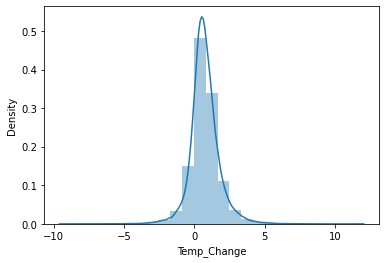

In [17]:
dist_plot = sns.distplot(df_temp3['Temp_Change'], bins=25) # Shows extreme values
# Some of the outliers in the high values may need to be removed


In [18]:
dist_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dist_plot.png'))

In [19]:
df_temp3['Temp_Change'].mean() # Check the mean

0.7369532495911256

In [20]:
df_temp3['Temp_Change'].median() # Check the median

0.666

In [21]:
df_temp3['Temp_Change'].max() # Check the max

11.759

In [22]:
df_temp3['Temp_Change'].min() #check the min

-9.303

### 3. Data prep for the Regression Analysis

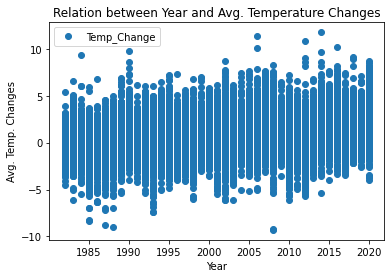

In [23]:
#Create a scatterplot using matplotlib for another look at how the variables plot against each other.
df_temp3.plot(x = 'Year', y='Temp_Change',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Relation between Year and Avg. Temperature Changes')  
plt.xlabel('Year')  
plt.ylabel('Avg. Temp. Changes')  
plt.show()

Hypothesis: As year progresses, the avg. Temperature Change increases

In [24]:
#Reshape the variables into NumPy arrays and put them into separate objects.   
X = df_temp3['Year'].values.reshape(-1,1)
y = df_temp3['Temp_Change'].values.reshape(-1,1)

In [25]:
X

array([[1982],
       [1983],
       [1984],
       ...,
       [2018],
       [2019],
       [2020]], dtype=int64)

In [26]:
y

array([[ 0.711],
       [ 0.546],
       [-0.043],
       ...,
       [ 0.747],
       [ 1.359],
       [ 0.82 ]])

In [27]:
#Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [28]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set."

In [29]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

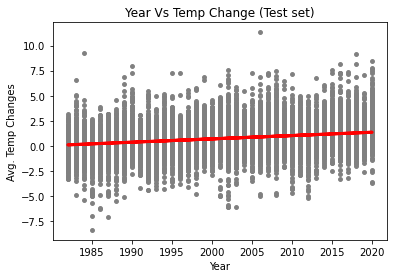

In [31]:
#Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year Vs Temp Change (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Avg. Temp Changes')
plot_test.show()

In [33]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [34]:
#Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.03312696]]
Mean squared error:  0.96262685275262
R2 score:  0.12662439877399934


From the above regression Analysis, Slope is 0.033 which says there is a positive relationship between the two variables, Year and Temp_Change. The R2 Score for the model is 0.126, or 13%, which makes it not a great fit for this data.

In [35]:
y_predicted

array([[1.12309648],
       [0.59306518],
       [0.22866865],
       ...,
       [1.22247735],
       [1.1893504 ],
       [0.49368431]])

In [36]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.796,1.123096
1,1.059,0.593065
2,-1.994,0.228669
3,0.486,1.156223
4,1.358,0.593065
5,0.572,1.255604
6,1.941,0.824954
7,0.397,0.924335
8,-0.076,0.294923
9,0.431,0.195542


##### Compare how the regression fits the training set

In [37]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03312696]]
Mean squared error:  0.965398359127904
R2 score:  0.1247642275051184


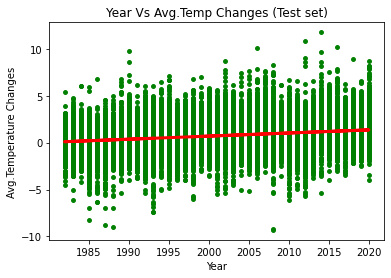

In [40]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Year Vs Avg.Temp Changes (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Avg.Temperature Changes')
plot_test.show()

### Performance improvement after removing outliers

In [41]:
# Clean the extreme values from the 'Temp_Change' variable observed during the consistency checks.
df_test = df_temp3[(df_temp3['Temp_Change'] >-5) & (df_temp3['Temp_Change'] < 5)] 

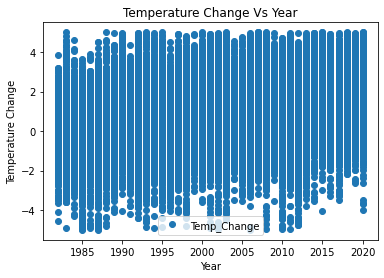

In [42]:
# See how the scatterplot looks without outliers.
df_test.plot(x = 'Year', y='Temp_Change', style='o')  
plt.title('Temperature Change Vs Year')  
plt.xlabel('Year')  
plt.ylabel('Temperature Change')  
plt.show()

In [43]:
# Reshape again.
X_2 = df_test['Year'].values.reshape(-1,1)
y_2 = df_test['Temp_Change'].values.reshape(-1,1)

In [44]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [45]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [46]:
# Predict
y_predicted_2 = regression.predict(X_test_2)


In [47]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03232318]]
Mean squared error:  0.8580849521642832
R2 score:  0.13131807797730533


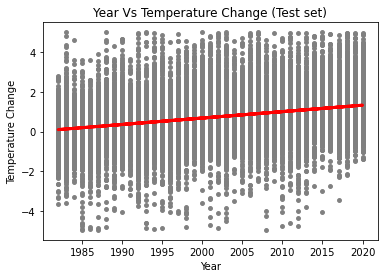

In [49]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_train_2, regression.predict(X_train_2), color='red', linewidth =3)
plot_test.title('Year Vs Temperature Change (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Temperature Change')
plot_test.show()

In [50]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,0.755,1.101529
1,1.852,1.295468
2,-0.069,0.552035
3,3.138,0.325773
4,0.762,1.230822
5,0.246,0.164157
6,0.332,0.842944
7,0.946,1.166175
8,0.076,0.390419
9,0.254,1.036883


From the above analysis, with a correlation coefficent of 0.03 does suggest a positive correlation between Year and Temp_Change variables, the regression line does not cover all the data points. Also a low R2 score of 13% makes this regression model not a good fit for the analysis. We may have to find another way to further the analysis. 